In [28]:
import Robogame as rg
import networkx as nx
import altair as alt
import time, json
import pandas as pd
import numpy as np
import nx_altair as nxa
import matplotlib.pyplot as plt

To start a game server go into the server directory. Make sure you have flask and networkx installed (```conda install networkx flask flask-cors requests scipy``` should do it).

To start a server do:

```python api.py [-d directoryforgame] [-s] [-t1s T1Secret] [-t2s T2Secret] gameid```

gameid is the the prefix of all the game files (the examples we gave you are examplematch1, examplematch2, examplematch3.

```
-d/--directory is an optional directory. For example, we put the examplematch1 files in the example1 directory
-s/--simulated tells us whether to simulate team 2
-t1s/--team1secret is Team 1's secret. If you don't specify this, the server will give you one
-t2s/--team1secret is Team 2's secret. This is ignored if you use -s. If you don't specify this, the server will give you one
-m/--matchsave is a log file to save the game in, a random log name will be used if you don't specify this
```

Here's a simple game:

```python api.py -d ./example1 -s -t1s bob examplematch1```

We're using the examplematch1 files in the example1 directory, simulating player 2 and team 1's secret is 'bob' (that's us)

In [31]:
# create a game connection using bob as the "secret" key for your team (this is what you're given by the server)
game = rg.Robogame("bob")

# the default is to the localhost on port 5000, if you want something else you can do:
# game = rg.Robogame("bob",server="12.12.31.1",port=2324)

In [32]:
# tell the server we're ready to go
game.setReady()

{'Result': 'OK'}

In [33]:
game.getGameTime()

{'curtime': 0,
 'gameendtime_secs': 1670794557.088256,
 'gamestarttime_secs': 1670793957.088256,
 'servertime_secs': 1670793947.847268,
 'unitsleft': 100}

In [34]:
# get the current game time
# there is a buffer before the game actually starts once both teams are ready

# wait for both players to be ready
while(True):
    gametime = game.getGameTime()
    timetogo = gametime['gamestarttime_secs'] - gametime['servertime_secs']
    
    if ('Error' in gametime):
        print("Error"+str(gametime))
        break
    if (timetogo <= 0):
        print("Let's go!")
        break
        
    print("waiting to launch... game will start in " + str(int(timetogo)))
    time.sleep(1) # sleep 1 second at a time, wait for the game to start
    

waiting to launch... game will start in 8
waiting to launch... game will start in 7
waiting to launch... game will start in 6
waiting to launch... game will start in 5
waiting to launch... game will start in 4
waiting to launch... game will start in 3
waiting to launch... game will start in 2
waiting to launch... game will start in 1
waiting to launch... game will start in 0
Let's go!


In [35]:
# check the current game time
game.getGameTime()

{'curtime': 0.27,
 'gameendtime_secs': 1670794557.088256,
 'gamestarttime_secs': 1670793957.088256,
 'servertime_secs': 1670793958.6806378,
 'unitsleft': 99.73}

In [36]:
# get the robot data (note that the bets column are the guesses your team has associated with the robots at the moment)
robots = game.getRobotInfo()

# if you want this in json format, do:
# robots = game.getRobotInfo(js=True)

In [37]:
# see what's inside
robots.sample(10)

,id,name,expires,winner,Productivity,winningTeam,bets
7,7,Wallpulverizer Botberg Jr.,53.0,-2,NaN,Unassigned,-1
62,62,Extrapulverizer Boterson,26.0,-2,NaN,Unassigned,-1
53,53,Extrawidget Botchik,74.0,-2,NaN,Unassigned,-1
122,122,Excawaller Botchik II,NaN,-2,NaN,Unassigned,-1
97,97,Wallwaller Botberg II,29.0,-2,NaN,Unassigned,-1
100,100,Wallwaller Botchik,NaN,-2,NaN,Unassigned,-1
36,36,Extravator Botsky,53.0,-2,NaN,Unassigned,-1
144,144,Firedigger Botberg II,NaN,-2,NaN,Unassigned,-1
107,107,Firelift Botson I,NaN,-2,NaN,Unassigned,-1
137,137,Thumpminer Botchik II,NaN,-2,NaN,Unassigned,-1


In [38]:
# let's plot the distribution of expirations
alt.Chart(robots).mark_bar().encode(
    alt.X("expires:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [39]:
# grab the networks
network = game.getNetwork()

In [40]:
network

{'directed': False,
 'graph': {},
 'links': [{'source': 0, 'target': 3},
  {'source': 0, 'target': 5},
  {'source': 0, 'target': 9},
  {'source': 0, 'target': 13},
  {'source': 0, 'target': 14},
  {'source': 0, 'target': 16},
  {'source': 0, 'target': 18},
  {'source': 0, 'target': 22},
  {'source': 0, 'target': 23},
  {'source': 0, 'target': 28},
  {'source': 0, 'target': 34},
  {'source': 0, 'target': 51},
  {'source': 0, 'target': 55},
  {'source': 0, 'target': 58},
  {'source': 0, 'target': 62},
  {'source': 0, 'target': 68},
  {'source': 0, 'target': 82},
  {'source': 0, 'target': 85},
  {'source': 0, 'target': 90},
  {'source': 0, 'target': 95},
  {'source': 1, 'target': 3},
  {'source': 1, 'target': 4},
  {'source': 1, 'target': 6},
  {'source': 1, 'target': 9},
  {'source': 1, 'target': 13},
  {'source': 1, 'target': 15},
  {'source': 1, 'target': 23},
  {'source': 1, 'target': 25},
  {'source': 1, 'target': 30},
  {'source': 1, 'target': 36},
  {'source': 1, 'target': 41},
  {

In [41]:
def read_graph_file(links):
    #js_graph = json.load(links)
    return nx.node_link_graph(links)

net = read_graph_file(network)

In [42]:
game.getHints()
robots = game.getRobotInfo()
hints = game.getAllPredictionHints()
hints_df = pd.DataFrame(hints)
prod = robots[robots.Productivity >0]
unprod = robots[robots.Productivity <0]
selection = alt.selection_multi(fields=['id'], empty = 'none')
colorCondition = alt.condition(selection, alt.value('blue'), alt.value('lightgrey')) # step 2
pos=alt.Chart(prod).mark_bar().encode(
    alt.X("id:N", sort = '-y', title = ''),
    alt.Y('Productivity', scale=alt.Scale(domain=[0, 100]), title = '')
)
neg=alt.Chart(unprod).mark_bar(color = 'red').encode(
    alt.X("id:N", sort = '-y'),
    alt.Y('Productivity')
)
bar = alt.layer(pos, neg).properties(width = 800).encode(color = colorCondition).add_selection(selection)
line = alt.Chart(hints_df).mark_line().encode(
    x=alt.X('time:Q'),
    y=alt.Y('value:Q'),
    color = 'id:N'
).properties(
    width=800,
    height=500
).transform_filter(selection)
circles = alt.Chart(hints_df).mark_point().encode(
    x=alt.X('time:Q'),
    y=alt.Y('value:Q'),
    color = 'id:N',
    tooltip = ['id', 'time', 'value']
).transform_filter(selection)
v_line = alt.Chart(robots).mark_rule(color='black').encode(
    x='expires',
    tooltip = ['id', 'expires']
).transform_filter(selection)
lines = alt.layer(line, circles, v_line)
bar & lines

alt.VConcatChart(...)

In [45]:
inp = input('Enter Robot of Interest: ')

new_links = []
node_id = int(inp)
for d in network['links']:
    if d['source'] == node_id:
        new_links.append(d)
new_nodes = []
for link in new_links:
    for n in network['nodes']:
        if n['id'] == link['target']:
            new_nodes.append(n)
node_network = {'directed': False,
               'graph': [],
               'links': new_links,
               'multigraph': False,
               'nodes': new_nodes}

nodenet = nx.node_link_graph(node_network)
node_pos = nx.kamada_kawai_layout(nodenet)
for n in nodenet.nodes():
    nodenet.nodes[n]['id'] = n
    nodenet.nodes[n]['name'] = robots.iloc[n]['name']
    nodenet.nodes[n]['winningTeam'] = robots.iloc[n]['winningTeam']
nxa.draw_networkx(G=nodenet, pos=node_pos, node_tooltip=['id', 'name', 'winningTeam'], node_color='winningTeam')




Enter Robot of Interest: 3


alt.LayerChart(...)

In [108]:
for n in np.arange(0,len(net.nodes)):
    # for every node, set its label property to string of the numerical id
    net.nodes[n]['label'] = str(n)
    net.nodes[n]['winning_team'] = robots.iloc[n]['winningTeam']
    
#pos = nx.spring_layout(net)
pos = nx.kamada_kawai_layout(net)

plt.figure(1, figsize=(80,80))

# let's break it apart into edges and nodes
edgeviz = nxa.draw_networkx_edges(net, pos=pos)
nodeviz = nxa.draw_networkx_nodes(net, pos=pos)


# add tooltips to the nodes
nodeviz = nodeviz.mark_circle(size=120).encode(tooltip=['label:N', 'winning_team:N'], color = 'winning_team')
edgeviz + nodeviz





alt.LayerChart(...)

<Figure size 8000x8000 with 0 Axes>

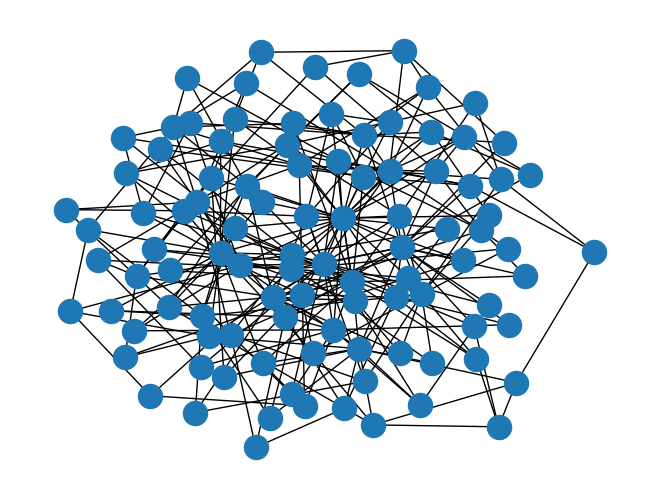

In [11]:
# use the networkx package to parse it and plot it
socialnet = nx.node_link_graph(network)
nx.draw_kamada_kawai(socialnet)

In [12]:
network.keys()

dict_keys(['directed', 'graph', 'links', 'multigraph', 'nodes'])

In [13]:
# get the genealogy tree
tree = game.getTree()

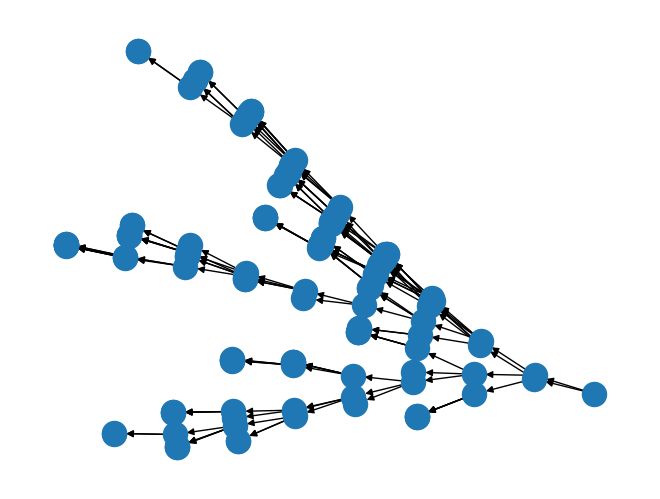

In [14]:
# use networkx to parse and plot it
genealogy = nx.tree_graph(tree)
nx.draw_kamada_kawai(genealogy)

In [15]:
# we can get hints every 6 seconds or so, let's grab a few rounds of hints

# note that you can now do getHints(hintstart=4)  where the number indicates
# from when to give you the hints (so this will give you everything from time
# unit 4 until now)
for i in np.arange(0,3):
    # this will give us just the new hints, but the object will store everything we've seen
    hints = game.getHints()
    if ('parts' in hints):
        print('we got '+str(len(hints['parts']))+' part hints')
    time.sleep(6)


# get all the hints we've collected
predHints = game.getAllPredictionHints()
partHints = game.getAllPartHints()

we got 18 part hints
we got 12 part hints
we got 12 part hints


In [16]:
# make the time hints into a dataframe
predhints_df = pd.read_json(json.dumps(predHints),orient='records')

In [17]:
# lets plot the data we got from all the robots
alt.Chart(predhints_df).mark_point().encode(
    x='time:Q',
    y='mean(value):Q'
)

alt.Chart(...)

In [18]:
# we can tell the hacker we're interested in robots 99, 23 and 1
game.setRobotInterest([99,23,5])

# to reset to being interested in all, use
# game.setRobotInterest([])

{'Result': 'OK'}

In [19]:
# we can also tell the hacker we're interesed in the 'Astrogation Buffer Length','InfoCore Size'
game.setPartInterest(['Astrogation Buffer Length','InfoCore Size'])

# to reset to being interested in all, use
# game.setPartInterest([])

{'Result': 'OK'}

In [20]:
# if we get more hints now, they'll be biased to the robots and parts we care about

for i in np.arange(0,3):
    # this will give us just the new hints, but the object will store everything we've seen
    hints = game.getHints()
    if ('parts' in hints):
        print('we got '+str(len(hints['parts']))+' part hints')
    time.sleep(6)

we got 36 part hints
we got 12 part hints
we got 12 part hints


In [21]:
# to set our bets, feed in a dictionary with the values
# for example, let's set robot id 0 to 99 and robot 5 to 72
game.setBets({0:99,5:72})

{'Result': 'OK'}

In [22]:
# let's see how we're doing, grab the data
robots = game.getRobotInfo()

In [23]:
# let's see how team 2 is doing (might be 0 if no deadlines expired)
robots[robots.winner == 2]['Productivity'].sum()

0.0

In [24]:
# let's see how team 1 is doing (might be 0 if no deadlines expired or we didn't put in any bets)
robots[robots.winner == 1]['Productivity'].sum()

0.0

In [25]:
# Here's a hint on how you can use the data you get to predict the value.
# Let's say we learn two points about a robot's random number generator
# At time 17, they'll say 40 and at time 50, they'll say 27
xs = [17,50]
ys = [40,27]

In [26]:
# we can use this to generate simple regression. One way to do it is to just fit a one dimensional polynomial
fit = np.polyfit(xs,ys,1)

# in reality, 1 dimension is probably not ideal

In [27]:
# next, we'll want to figure out all the y values over the range of times 0 to 100
fitx = np.arange(0,100)
fity = []

In [28]:
# create the fit function using the fit we calculated above
fitfunc = np.poly1d(fit)
for x in fitx:
    y = fitfunc(x)
    if (y > 100): # we know y can't be > 100
        y = 100
    if (y < 0): # we know y can't be < 0
        y = 0
    fity.append(y)

In [29]:
# to visualize this, I'm going to build a dataset the has both the original numbers 
# our hacker gave us (17,50 and 40,27) and the new things we calculated:
vals = []
for i in np.arange(0,len(xs)):
    vals.append({'t':'hint','x':int(xs[i]),'y':int(ys[i])})
   
for i in np.arange(0,len(fitx)):
    vals.append({'t':'fit','x':int(fitx[i]),'y':int(fity[i])})

# so now we have a dataset with both the hint and fit data
# you can look at it here
# vals

In [30]:
# finally, let's plot the data using Altair

# first make a chart for the hints
hintlayer = alt.Chart(alt.Data(values=vals)).mark_circle(filled=True,size=90,color='red').encode(
    x='x:Q',
    y='y:Q',
    color='t:N'
).transform_filter(
    alt.datum.t == 'hint'
)

# overlay that with the predictions
fitlayer = alt.Chart(alt.Data(values=vals)).mark_line().encode(
    x='x:Q',
    y='y:Q',
    color='t:N'
).transform_filter(
    alt.datum.t == 'fit'
)

# and let's assume an expiration of 70 for this robot and draw a line on top

annotationlayer = alt.Chart(pd.DataFrame({'x': [70]})).mark_rule().encode(x='x:Q')

# layer the charts
hintlayer + fitlayer + annotationlayer


alt.LayerChart(...)

## A few other random "recipes"

In [31]:
# set all the bets to 80
bets = {}
for i in np.arange(0,100):
    bets[int(i)] = int(80)
game.setBets(bets)

{'Result': 'OK'}

In [32]:
# get all the game parts since the start of the game
game.getHints(hintstart=0)['parts']

[{'column': 'Arakyd Vocabulator Model', 'id': 16, 'value': 'beta'},
 {'column': 'Arakyd Vocabulator Model', 'id': 7, 'value': 'alpha'},
 {'column': 'Arakyd Vocabulator Model', 'id': 72, 'value': 'gamma'},
 {'column': 'Nanochip Model', 'id': 94, 'value': 'windows 2000'},
 {'column': 'Nanochip Model', 'id': 18, 'value': 'windows 2000'},
 {'column': 'Polarity Sinks', 'id': 9, 'value': 0.1160879046330163},
 {'column': 'Arakyd Vocabulator Model', 'id': 77, 'value': 'beta'},
 {'column': 'AutoTerrain Tread Count', 'id': 14, 'value': 1.8805395679596009},
 {'column': 'Sonoreceptors', 'id': 16, 'value': 39.0},
 {'column': 'Sonoreceptors', 'id': 57, 'value': 10.0},
 {'column': 'Nanochip Model', 'id': 8, 'value': 'windows 2000'},
 {'column': 'InfoCore Size', 'id': 12, 'value': -0.2434313737897846},
 {'column': 'Cranial Uplink Bandwidth', 'id': 25, 'value': 98.0},
 {'column': 'AutoTerrain Tread Count', 'id': 96, 'value': 1.3605642042528232},
 {'column': 'Axial Piston Model', 'id': 2, 'value': 'mode

In [33]:
# debug information while game is in simulation
game.getDebug()

{'team1secret': 'bob',
 'team2secret': '56bfa242-a76f-41ff-a650-998d7281db9b',
 'team1_int_bots': [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [99, 23, 5],
  [99, 23, 5],
  [99, 23, 5],
  [99, 23, 5],
  [99, 23, 5],
  [99, 23, 5],
  [99, 23, 5],
  [99, 23, 5],
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'team2_int_bots': [[],
  [],
  [],
  [],
  [],
  [],
  []